## Clarke Larsen Analysis Notebook

**All work completed in this notebook was done by Clarke Larsen**

*Work done for Data 301 Group Project with group 1032*

In [1]:
import pandas as pd 
import numpy as np
import sys
import importlib
sys.path.append(sys.path[0] + "\..\scripts")
import project_functions as pf
importlib.reload(pf)

<module 'project_functions' from 'C:\\Users\\Clarke\\Documents\\School Docs\\Third Year Homework\\DATA 301\\Data301-Project\\analysis\\Clarke\\..\\scripts\\project_functions.py'>

In [2]:
df= pf.load_and_process("../../Dataset.csv")
df

Year           State            Division                  County  \
87433  2013       Tennessee  East South Central                  PUTNAM   
82563  2013        Virginia      South Atlantic                   HENRY   
28695  2013        Michigan  East North Central                   WAYNE   
28696  2013        Michigan  East North Central                   WAYNE   
60314  2013  South Carolina      South Atlantic                   HORRY   
...     ...             ...                 ...                     ...   
27083  2019  South Carolina      South Atlantic  DORCHESTER; CHARLESTON   
27084  2019  South Carolina      South Atlantic  DORCHESTER; CHARLESTON   
27089  2019  South Carolina      South Atlantic                  SALUDA   
27070  2019  North Carolina      South Atlantic                 ROBESON   
45834  2019           Texas  West South Central                 KAUFMAN   

        Region                    Population_Description  \
87433    South            Cities from 25,000 thru 49,999   
82563    South  Non-MSA counties from 25,000 thru 99,999   
28695  Midwest            Cities from 50,000 thru 99,999   
28696  Midwest            Cities from 50,000 thru 99,999   
60314    South              MSA counties 100,000 or over   
...        ...                                       ...   
27083    South          Cities from 100,000 thru 249,999   
27084    South          Cities from 100,000 thru 249,999   
27089    South      MSA counties from 10,000 thru 24,999   
27070    South  Non-MSA counties from 25,000 thru 99,999   
45834    South            Cities from 10,000 thru 24,999   

                                       Offense Offender_Race  \
87433                 Theft From Motor Vehicle           NaN   
82563                        All Other Larceny         White   
28695                             Embezzlement         White   
28696                             Embezzlement         White   
60314                        All Other Larceny           NaN   
...                                        ...           ...   
27083                      Motor Vehicle Theft           NaN   
27084                      Motor Vehicle Theft           NaN   
27089                      Motor Vehicle Theft           NaN   
27070  False Pretenses/Swindle/Confidence Game           NaN   
45834             Burglary/Breaking & Entering           NaN   

      Offender_Ethnicity  Offender_Age Offender_Sex Victim_Type  \
87433                NaN           NaN          NaN    Business   
82563                NaN          25.0            M  Individual   
28695                NaN          30.0            M    Business   
28696                NaN          31.0            M    Business   
60314                NaN           NaN          NaN    Business   
...                  ...           ...          ...         ...   
27083                NaN           NaN          NaN  Individual   
27084                NaN           NaN          NaN  Individual   
27089                NaN           NaN          NaN  Individual   
27070                NaN           NaN          NaN  Individual   
45834                NaN           NaN          NaN  Individual   

                                 Location               Weapon  \
87433             Parking/Drop Lot/Garage                  NaN   
82563                 Service/Gas Station                  NaN   
28695  Highway/Road/Alley/Street/Sidewalk  Firearm (Automatic)   
28696  Highway/Road/Alley/Street/Sidewalk  Firearm (Automatic)   
60314                     Specialty Store                  NaN   
...                                   ...                  ...   
27083                      Residence/Home                  NaN   
27084                      Residence/Home                  NaN   
27089                         Field/Woods                  NaN   
27070               Bank/Savings and Loan                  NaN   
45834                      Residence/Home                  NaN   

                  

---
## Lets take a look at the regions given in the dataframe and compare them

The regions in our data set can be seen to cover the following area

![Image](../../images/regionsmapFBI.gif)

*Image taken from https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/area-definitions*

### One of our main questions we had was asking which region or specific state has the worst theft?

We will start with a general overview of the data in terms of the broad regions outlines by the figure above provided by the FBI

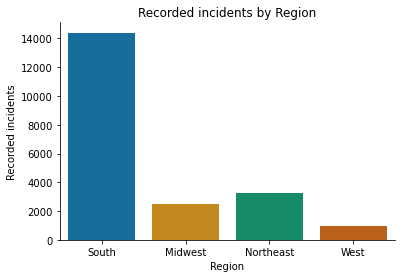

In [10]:
def theft_by_area(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    theft=sns.countplot(x="Region",data=dataFrame,palette='colorblind')
    sns.despine()
    plt.ylabel("Recorded incidents")
    plt.title("Recorded incidents by Region")
    
theft_by_area(df)



We see that by far the South region has the most occurances of crime

If we compare percentage wise we see similar results:

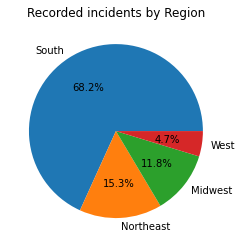

In [12]:
def theft_by_area_pie(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    pie_graph=plt.pie(dataFrame["Region"].value_counts(),labels=dataFrame["Region"].value_counts().iloc[:4].index,autopct='%1.1f%%')
    plt.title("Recorded incidents by Region")
    
theft_by_area_pie(df)

Which gives us a similar result, early analysis is showing us that the South region has more crime than all the other regions combined!

### Lets take a deeper look into the South Region

In [58]:
df_south=df[df["Region"]=="South"]
states=df_south.State.unique()
states

array(['Tennessee', 'Virginia', 'South Carolina', 'Florida',
       'West Virginia', 'Arkansas', 'Delaware', 'Mississippi', 'Texas',
       'Oklahoma', 'Maryland', 'Georgia', 'Kentucky', 'Alabama',
       'North Carolina'], dtype=object)

So these are the states that are included in the South Region, lets see which states are worst for theft

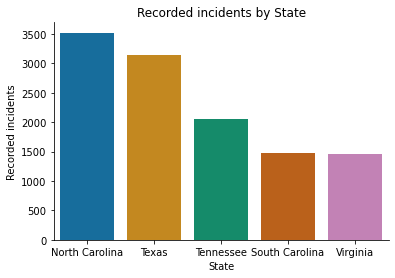

In [29]:
def theft_by_state(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    theft=sns.countplot(x="State",data=dataFrame,order=dataFrame["State"].value_counts().iloc[:5].index,palette='colorblind')
    sns.despine()
    plt.ylabel("Recorded incidents")
    plt.title("Recorded incidents by State")


theft_by_state(df_south)




***Lets see how these 5 shape up nation wide***


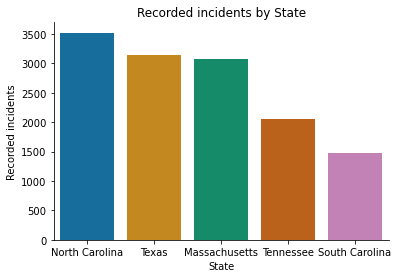

In [31]:
theft_by_state(df)

### So the South region contains 4 of the top 5 most reported incidents by state



**The one expection is Massachusetts which is found in the Northeast Region**

What if we consider the value of goods stolen by Region?

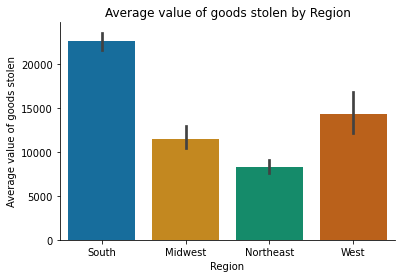

In [34]:
def averages_values_stolen_by_area(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    aerage_value=sns.barplot(x="Region",y="Stolen_Value",data=dataFrame,palette='colorblind')
    sns.despine()
    plt.ylabel("Average value of goods stolen")
    plt.title("Average value of goods stolen by Region")
    
averages_values_stolen_by_area(df)

Again we see that the South region is be far the worst region for crime, this time with an average value of goods stolen almost double the rest of the regions excluding the West

  
#### This leads us to the conclusion that the South Region is the worst of the defined regions in terms of crime occurance and severity. In particular the states of North Carolina and Texas experience very high rates of reported incidents. 

---
## Another Question we had was what goods are the most frequently stolen?

Lets start by finding the 5 most commonly reported incidences by good type

In [46]:
top_5_stolen=df["Property_Type"].value_counts().iloc[:5].index
print("The top 5 most commonly stolen items are:\n")
for i in range(0,5):
    print("- {}\n".format(top_5_stolen[i]))

The top 5 most commonly stolen items are:

- Automobile

- Other

- Tools

- Money

- Trailers



  
#### How many times were these top 5 items stolen?
  

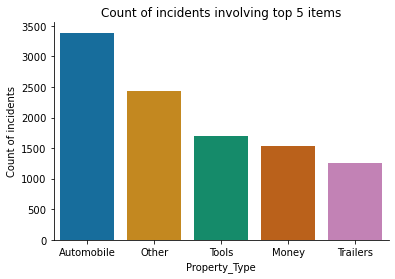

In [55]:
def top_5_stolen(dataframe):
    import matplotlib.pyplot as plt
    import seaborn as sns
    top_5_stolen=dataframe["Property_Type"].value_counts().iloc[:5].index
    top_5=sns.countplot(x="Property_Type",data=dataframe,order=top_5_stolen,palette='colorblind')
    sns.despine()
    plt.ylabel("Count of incidents")
    plt.title("Count of incidents involving top 5 items")
    
top_5_stolen(df)


**Unfortuntaley we do not have any more information on the "Other" category so lets choose to ignore it**

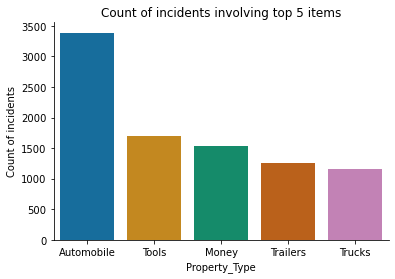

In [56]:
df_sub_other=df[df["Property_Type"]!="Other"]
top_5_stolen(df_sub_other)

On first glance we see that many of these categories involve or relate to vehicles  
  
We also see that the Automobile category almost twice as large as the second largest Tools category

#### Lets now look at how these top 5 change by region

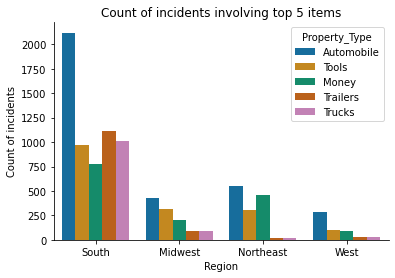

In [60]:
def top_5_stolen_by_region(dataframe):
    import matplotlib.pyplot as plt
    import seaborn as sns
    top_5_stolen=dataframe["Property_Type"].value_counts().iloc[:5].index
    top_5=sns.countplot(x="Region",hue="Property_Type",data=dataframe,hue_order=top_5_stolen,palette='colorblind')
    sns.despine()
    plt.ylabel("Count of incidents")
    plt.title("Count of incidents involving top 5 items")
    
top_5_stolen_by_region(df_sub_other)

A few interesting trends are seen here:
>-Money theft appears to be more prevalent in the Northeast compared to other regions  
>-The South region is unique in that it's Money theft counts are the lowest of the top 5, with other states having this value be second or third  
>-Also in the South, Trailer and Truck theft are both second and third highest respectively, while in other Regions these are almost equally as common but rank fourth or fifth

#### With this analysis in mind, we can conclude that the Automobile category seems to uniformly be the most frequently reported theft. If we consider vehicles in general by also including Trailers and Trucks, our conclusion is that theft pertaining to the automotive industry is most frequently stolen.
  
---